In [233]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image 
import cv2
import os
import collections

import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


['fruits-360_dataset']
fruits-360_dataset



In [234]:
import numpy as np 
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

In [235]:
indi = 50
img_size = 70
c1 = 16
c2 = 2*c1
c3 = 2*c2
c4 = 2*c3
aug =0
d1 = 8*c4
d2 = 4*c4

batch_size=32
d_out_c = 0.23
d_out_d = 0.46
lr1 = 0.0004
epochs=20

In [236]:
np.random.seed(4444)
data_path1="../input/fruits-360_dataset/fruits-360/Training/"
classes = []
ind = 1
aa = []
aa.append('Apple Red 1')
# aa.append('Avocado')
# aa.append('Apple Red 3')
aa.append('Potato Sweet')
aa.append('Pear')
aa.append('Beetroot')
aa.append('Carambula')
aa.append('Pear Red')
aa.append('Apple Golden 1')
# aa.append('Banana')
for folder_name in os.listdir(data_path1):
    if(folder_name in aa):
        pass
    else:
        classes.append(folder_name)
        ind+=1
    if(ind>indi):
        break
print(len(classes))

50


In [237]:
all_arrays=[]

ind=1
print("Reading training data: ")
for i in classes:
    path=os.path.join(data_path1,i)
    class_num=classes.index(i)
    if(ind==1 or ind%int(indi/10)==0):
        print(ind, "Out of ",len(classes), " is done")
    ind+=1
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])
    if ind>indi:
        break
print('done here')

Reading training data: 
1 Out of  50  is done
5 Out of  50  is done
10 Out of  50  is done
15 Out of  50  is done
20 Out of  50  is done
25 Out of  50  is done
30 Out of  50  is done
35 Out of  50  is done
40 Out of  50  is done
45 Out of  50  is done
50 Out of  50  is done
done here


In [238]:
data_path2="../input/fruits-360_dataset/fruits-360/Test/"
classes2 = []
ind = 1
for folder_name in os.listdir(data_path2):
    if(folder_name in aa):
        pass
    else:
        classes2.append(folder_name)
        ind+=1
    if ind>indi:
        break
print(len(classes2), "fruits for Testing ")

all_arrays2 = []

ind = 1
print("Reading training data: ")
for i in classes2:
    path=os.path.join(data_path2,i)
    class_num2=classes2.index(i)
    if(ind==1 or ind%int(indi/10)==0):
        print(ind, "Out of ",len(classes)," is done")
    ind+=1
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])
    if ind>indi:
        break
print('done here')

50 fruits for Testing 
Reading training data: 
1 Out of  50  is done
5 Out of  50  is done
10 Out of  50  is done
15 Out of  50  is done
20 Out of  50  is done
25 Out of  50  is done
30 Out of  50  is done
35 Out of  50  is done
40 Out of  50  is done
45 Out of  50  is done
50 Out of  50  is done
done here


In [239]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

In [240]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train)

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test)


In [241]:
X_train=X_train.reshape(-1,img_size,img_size,1)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,1)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (25313, 70, 70, 1)
shape of X_test=   (8613, 70, 70, 1)


In [242]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(classes))
Y_test=to_categorical(Y_test,num_classes=len(classes))

In [243]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.15,random_state=42)

In [244]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model=Sequential()

model.add(Conv2D(filters=c1,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(d_out_c))

model.add(Conv2D(filters=c2,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(d_out_c))

model.add(Conv2D(filters=c3,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(d_out_c))

model.add(Conv2D(filters=c4,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(d_out_c))

model.add(Conv2D(filters=c4*2,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(d_out_c))

model.add(Flatten())

model.add(Dense(d1,activation="relu"))
model.add(Dropout(d_out_d))

model.add(Dense(d2,activation="relu"))
model.add(Dropout(d_out_d))

model.add(Dense(len(classes),activation="softmax"))

optimizer=Adam(lr=lr1,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])



In [245]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 70, 70, 16)        416       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 35, 35, 16)        0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 35, 35, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 35, 35, 32)        12832     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 17, 17, 64)        51264     
__________

In [246]:
datagen=ImageDataGenerator(featurewise_center=False, 
                           samplewise_center=False,  
                           featurewise_std_normalization=False, 
                           samplewise_std_normalization=False,  
                           zca_whitening=False,  
                           rotation_range=aug,  
                           zoom_range=aug,      
                           width_shift_range=aug, 
                           height_shift_range=aug,
                           horizontal_flip=False,  
                           vertical_flip=False,
                           )
datagen.fit(x_train)

history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size)


Epoch 1/20
672/672 [==============================] - 10s 15ms/step - loss: 0.0655 - acc: 0.9817 - val_loss: 0.0251 - val_acc: 0.9901
Epoch 2/20
672/672 [==============================] - 8s 12ms/step - loss: 0.0185 - acc: 0.9930 - val_loss: 0.0088 - val_acc: 0.9972
Epoch 3/20
672/672 [==============================] - 8s 11ms/step - loss: 0.0079 - acc: 0.9972 - val_loss: 0.0014 - val_acc: 0.9996
Epoch 4/20
672/672 [==============================] - 8s 11ms/step - loss: 0.0043 - acc: 0.9985 - val_loss: 0.0017 - val_acc: 0.9996
Epoch 5/20
672/672 [==============================] - 8s 12ms/step - loss: 0.0031 - acc: 0.9990 - val_loss: 2.2927e-04 - val_acc: 0.9999
Epoch 6/20
672/672 [==============================] - 8s 11ms/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0049 - val_acc: 0.9984
Epoch 7/20
672/672 [==============================] - 8s 11ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 1.6633e-04 - val_acc: 0.9999
Epoch 8/20
672/672 [==============================] - 8s 11m

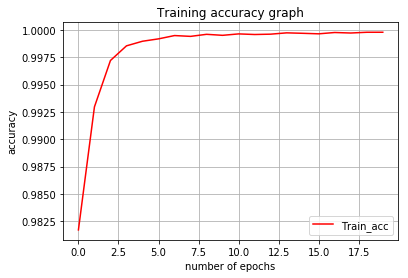

In [247]:
# graph plotting for laidation accuracy
plt.plot(history.history["acc"],color="r",label="Train_acc")
plt.title("Training accuracy graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

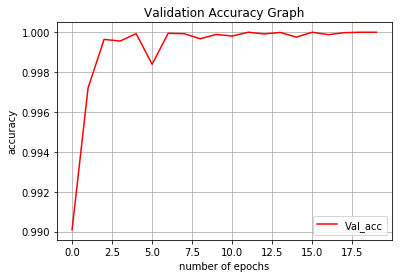

In [248]:
# graph plotting for laidation accuracy
plt.plot(history.history["val_acc"],color="r",label="Val_acc")
plt.title("Validation Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

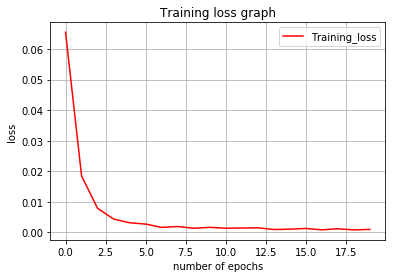

In [249]:
plt.plot(history.history["loss"],color="r",label="Training_loss")
plt.title("Training loss graph")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

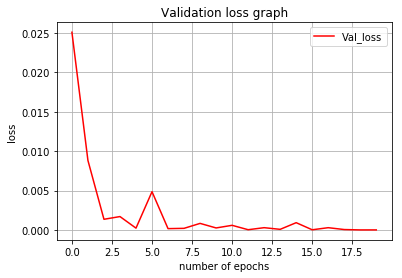

In [250]:
plt.plot(history.history["val_loss"],color="r",label="Val_loss")
plt.title("Validation loss graph")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

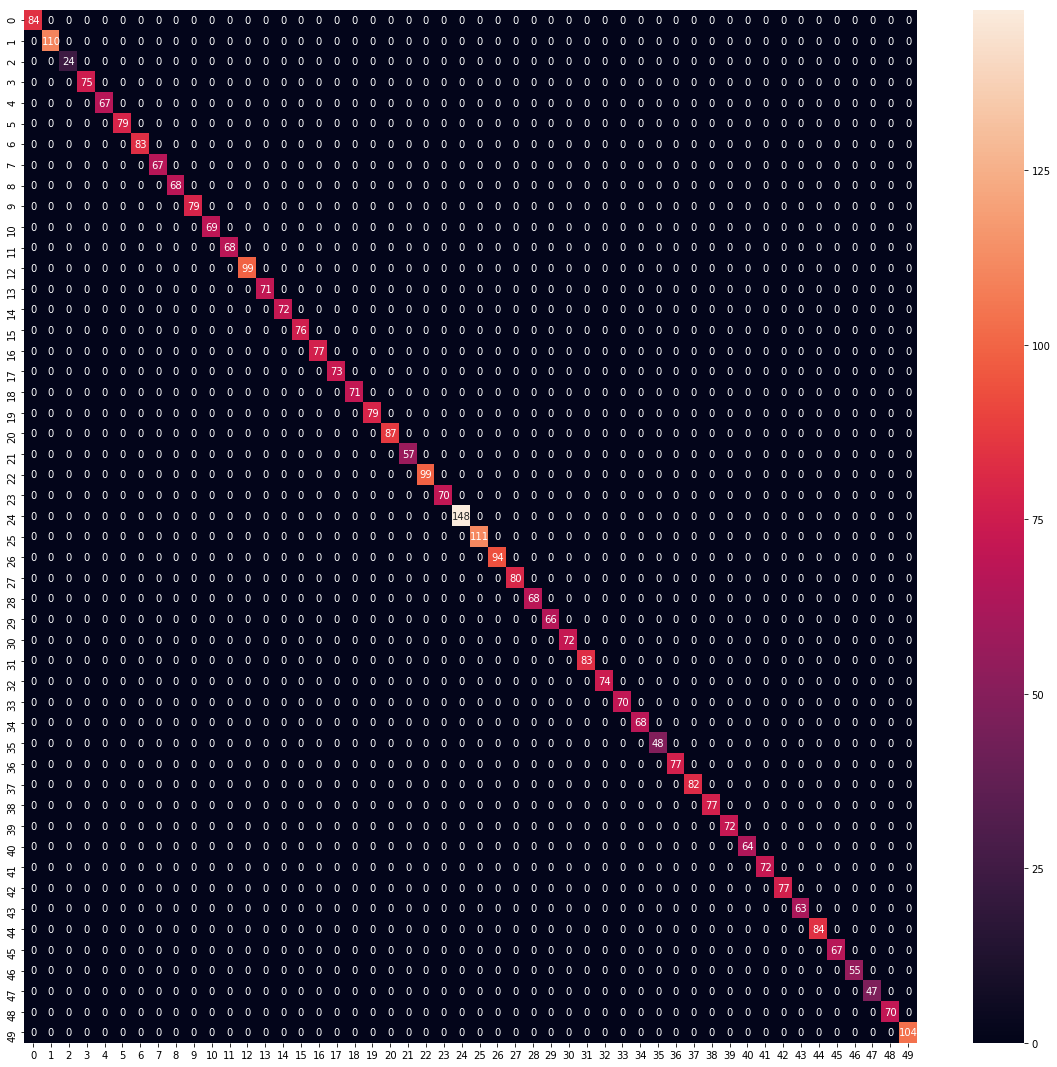

100.0 Percent validation accuracy


In [251]:
#confusion matrix for validation data
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)

conf_mat=confusion_matrix(y_true,y_pred_classes)

f,ax=plt.subplots(figsize=(20,19))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
plt.show()

n = 0;
d = 0;
for i in range(len(y_true)):
    if(y_true[i] == y_pred_classes[i]):
        n += 1
    d += 1
val_accu=n*100/d
print(val_accu, "Percent validation accuracy")

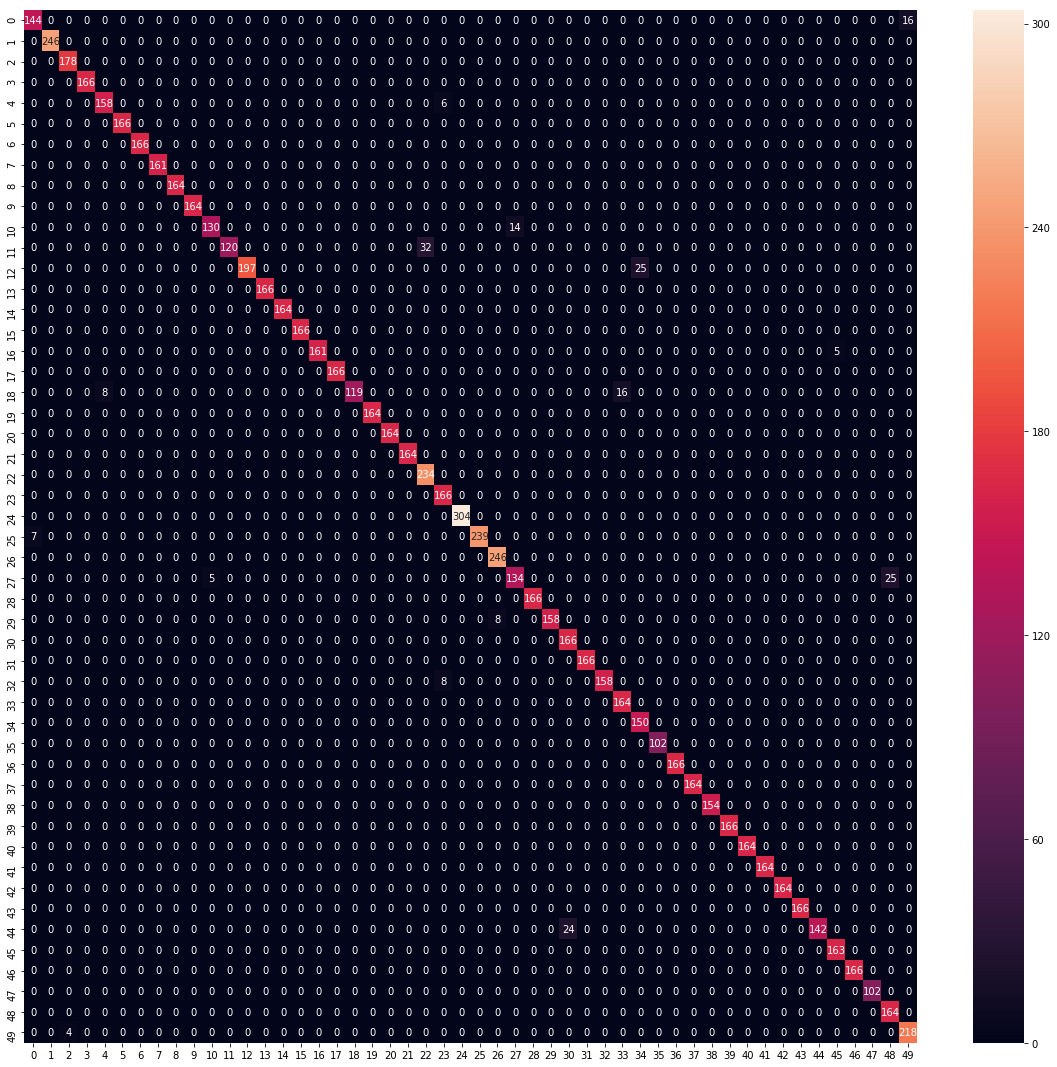

97.76139057150382 Percent test accuracy


In [252]:
#confusion matrix for test data
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)

conf_mat2=confusion_matrix(y_true2,y_pred_classes2)

f,ax=plt.subplots(figsize=(20,19))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
plt.show()

n = 0;
d = 0;
for i in range(len(y_true)):
    if(y_true2[i] == y_pred_classes2[i]):
        n += 1
    d += 1
test_accu=n*100/d
print(test_accu, "Percent test accuracy")

In [253]:
TP = []
TD = []
for i in range(len(classes)):
    TP.append(0)
    TD.append(0)
    
n = 0;
d = 0;
for i in range(len(y_true)):
    if(y_true2[i] == y_pred_classes2[i]):
        TP[y_true2[i]]+=1
    TD[y_true2[i]]+=1

In [254]:
print("Testing phase bad accuracy fruits:")
wl = []
for i in range(len(classes)):
    accur = (TP[i]/TD[i])*100
    if(accur<95):
        print(int(accur*10)/10,"%",classes[i])
        wl.append(i)

Testing phase bad accuracy fruits:
85.8 % Nectarine Flat
90.1 % Apple Red 3
76.3 % Apple Pink Lady
90.4 % Pepper Yellow
87.8 % Avocado
83.8 % Peach
93.5 % Huckleberry
85.0 % Quince


In [255]:
not_there = []
xy = []
for i in range(len(y_true2)):
    y = y_true2[i]
    x = y_pred_classes2[i]
    if(x!=y and (y in wl or x in wl)):
        xy.append(x)
        xy.append(y)
        if(xy not in not_there):
            not_there.append(xy)
            print(classes[y], "was predicted as", classes[x])
            
        xy = []

Avocado was predicted as Apple Braeburn
Apple Red 3 was predicted as Peach
Apple Pink Lady was predicted as Pear Forelle
Avocado was predicted as Pomegranate
Huckleberry was predicted as Cherry 2
Pepper Yellow was predicted as Onion Red
Quince was predicted as Pepino
Nectarine Flat was predicted as Pepper Red
Peach was predicted as Apricot
Tomato 3 was predicted as Nectarine Flat
Peach was predicted as Apple Red 3
